In [1]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

We wish to look at how Danish wealth is made up. We use the table FORMUE11 from Danmarks Statistik to look at this.

In [67]:
#We import the data using the DST API. We then display a table to summarize the data
wealth = DstApi('FORMUE12')
tabsum = wealth.tablesummary(language='en')
display(tabsum)
pd.set_option('display.max_rows', None) #This ensures that we see all the places. Useful for selecting the data we want to use.
#We show the contents of the table in more detail.
for variable in tabsum['variable name']:
    print(variable+':')
    display(wealth.variable_levels(variable, language='en'))


Table FORMUE12: Wealth by type of wealth, unit, region, age, population and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,FORM1,46,FGNF2020,"Net Wealth, (2020-definition A+B+CX-D-E-F)",FGF4,F.4. Other debt to the public sector,False
1,ENHED,9,200,Median (Constant prices 2021-level),240,Number of people in population 31.12,False
2,OMRÅDE,104,000,All Denmark,851,Aalborg,False
3,ALDER,5,1802,18 years and over,7099,70 years and over,False
4,POPU,2,5005,Entire population,5025,Only people with the selected type of wealth,False
5,Tid,9,2014,2014,2022,2022,True


FORM1:


,id,text
0,FGNF2020,"Net Wealth, (2020-definition A+B+CX-D-E-F)"
1,FGNF2014,"Net Wealth, (2014-definition A+B-B6+CX-D-E-F+F3)"
2,FGAK2020,Assets total (2020-definition A+B+CX)
3,FGAK2014,Assets total (2014-definition A+B+CX-B6)
4,FGA,A. Real assets
5,FGA1,A.1. Value of Main residence
6,FGA2,A.2. Value of flat in housing co-operative
7,FGA3,A3. Value of vacation cottage
8,FGA4,"A.4. Other real estate (rental dwelling, unbui..."
9,FGA5,A.5. Cars


ENHED:


,id,text
0,200,Median (Constant prices 2021-level)
1,205,Lower quartile (Constant prices 2021-leel)
2,210,Upper quartile (Constant prices 2021-level)
3,215,Average (Constant prices 2021-level)
4,220,Median (Nominal prices)
5,225,Lower quartile (Nominal prices)
6,230,Upper quartile (Nominal prices)
7,235,Average (Nominal prices)
8,240,Number of people in population 31.12


OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,101,Copenhagen
3,147,Frederiksberg
4,155,Dragør
5,185,Tårnby
6,165,Albertslund
7,151,Ballerup
8,153,Brøndby
9,157,Gentofte


ALDER:


,id,text
0,1802,18 years and over
1,1829,18-29 years
2,3049,30-49 years
3,5069,50-69 years
4,7099,70 years and over


POPU:


,id,text
0,5005,Entire population
1,5025,Only people with the selected type of wealth


Tid:


,id,text
0,2014,2014
1,2015,2015
2,2016,2016
3,2017,2017
4,2018,2018
5,2019,2019
6,2020,2020
7,2021,2021
8,2022,2022


In [17]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = wealth._define_base_params(language='en')
params

variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['FGA5', 'FGC', 'FGB2014', 'FGB1', 'FGAK2014']

variables[1]['values'] =['235','240']
variables[2]['values'] = ['101', '751', '153', '376', '183', '482', '730', '760', '810']
variables[3]['values'] = ['1802']
variables[4]['values'] = ['5005', '5025']
params

#And now we load the data while checking that it looks somewhat correct.
wealth_api = wealth.get_data(params=params)

#We now rename the variables such that it is easier to use.
var_dict = {} # var is for variable
var_dict['A.5. Cars'] = 'Cars'
var_dict['C. Pensions in total'] = 'Pensions'
var_dict['B.1. Deposits in bank'] = 'Deposits'
var_dict['B. Financial assets, total (2014-definition excluding B6)'] = 'Total assets'
column_dict = {'FORM1': 'Variable', 'ENHED': 'Unit', 'OMRÅDE': 'Area', 'ALDER': 'Age', 'POPU': 'Population', 'TID': 'Year', 'INDHOLD': 'Value'}
wealth_api = wealth_api.rename(columns=column_dict)
wealth_api = wealth_api.rename(index=var_dict)      
plot_data = wealth_api.set_index('Year')
wealth_api.tail(5)

,Variable,Unit,Area,Age,Population,Year,Value
1615,C. Pensions in total,Number of people in population 31.12,Aarhus,18 years and over,Only people with the selected type of wealth,2022,285759
1616,C. Pensions in total,Number of people in population 31.12,Ringkøbing-Skjern,18 years and over,Entire population,2022,44964
1617,C. Pensions in total,Number of people in population 31.12,Ringkøbing-Skjern,18 years and over,Only people with the selected type of wealth,2022,43472
1618,C. Pensions in total,Number of people in population 31.12,Brønderslev,18 years and over,Entire population,2022,28751
1619,C. Pensions in total,Number of people in population 31.12,Brønderslev,18 years and over,Only people with the selected type of wealth,2022,27748


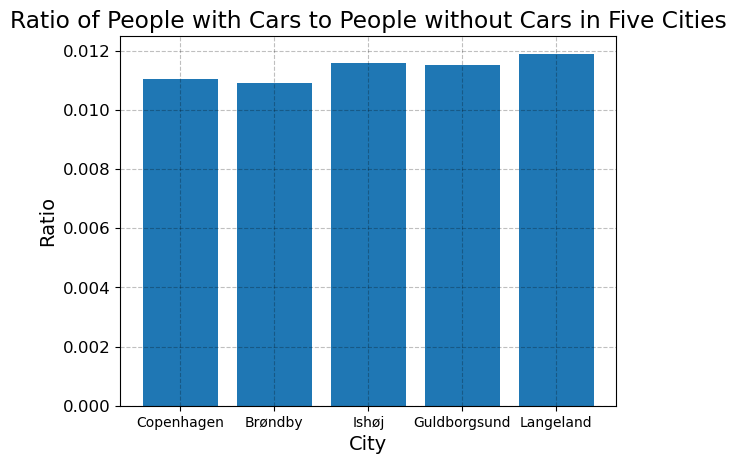

In [4]:
# Here we calculate the ratio of people with cars to people without cars
ratio = plot_data[plot_data['Variable'] == 'A.5. Cars']['Value'] / plot_data[plot_data['Variable'] != 'A.5. Cars']['Value']

# We then select the citis we would like to look at
cities = plot_data[plot_data['Variable'] == 'A.5. Cars']['Area'].unique()[:5]
# PFrom here we plot the data
plt.bar(cities, ratio[:5])
plt.xlabel('City')
plt.ylabel('Ratio')
plt.title('Ratio of People with Cars to People without Cars in Five Cities')
plt.xticks(fontsize=10)  # Modify the font size of x-axis labels
plt.yticks(fontsize=12)  # Modify the font size of y-axis labels
plt.show()

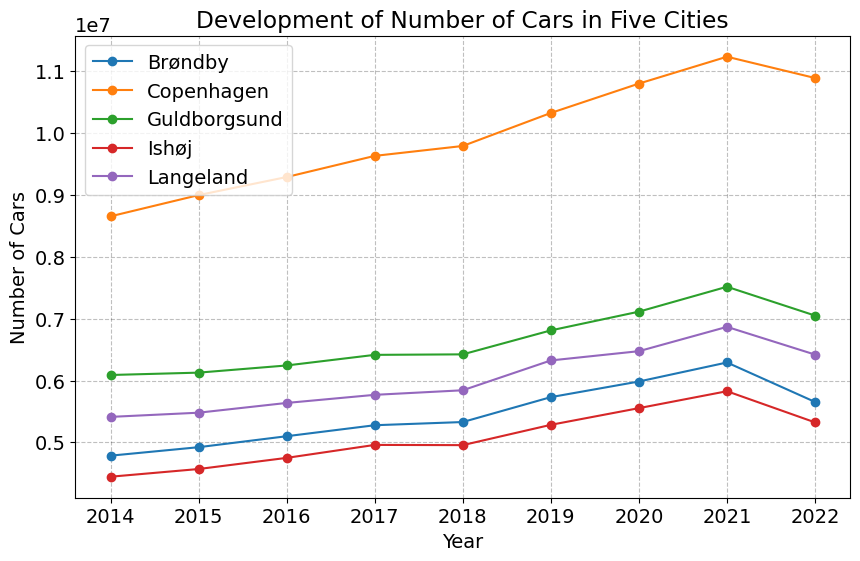

In [5]:
# First we select the cities we want to look at
cities = ['Copenhagen', 'Brøndby', 'Ishøj', 'Guldborgsund', 'Langeland']
filtered_data = plot_data[plot_data['Area'].isin(cities)]

# We make sure that the data is sorted by year
grouped_data = filtered_data.groupby(['Year', 'Area'])['Value'].sum()

# Then we can reshape the data to have cities as columns and years as index
pivot_data = grouped_data.unstack()

# Now we can plot the data
pivot_data.plot(marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Development of Number of Cars in Five Cities')
plt.legend()
plt.show()

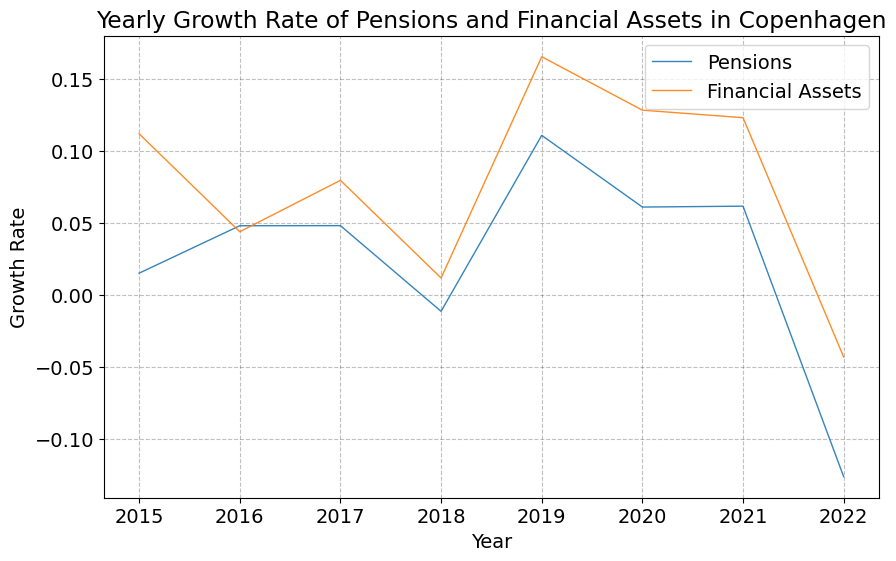

In [75]:
import matplotlib.pyplot as plt

# First we filter our data for pensions, average nominal prices, and Copenhagen
pensions = wealth_api[(wealth_api['Variable'] == 'C. Pensions in total') & 
                      (wealth_api['Unit'] == 'Average (Nominal prices)') & 
                      (wealth_api['Area'] == 'Copenhagen')]

# Like before we make sure there's only one row per 'Year' and 'Area'
pensions = pensions.groupby(['Year', 'Area'])['Value'].mean().reset_index()

# We now want to calculate the yearly growth rate
pensions['Yearly Growth'] = pensions.groupby('Area')['Value'].pct_change()

# Here we filter out what data we want to use 
assets = wealth_api[(wealth_api['Variable'] == 'B. Financial assets, total (2014-definition excluding B6)') & 
                    (wealth_api['Unit'] == 'Average (Nominal prices)') & 
                    (wealth_api['Area'] == 'Copenhagen')]

# Again, we make sure there's only one row per 'Year' and 'Area'
assets = assets.groupby(['Year', 'Area'])['Value'].mean().reset_index()

# We can now calculate the yearly growth rate again
assets['Yearly Growth'] = assets.groupby('Area')['Value'].pct_change()

# Then we plot the data
plt.figure(figsize=(10, 6))
plt.plot(pensions['Year'], pensions['Yearly Growth'], marker='', linewidth=1, alpha=0.9, label='Pensions')
plt.plot(assets['Year'], assets['Yearly Growth'], marker='', linewidth=1, alpha=0.9, label='Financial Assets')
plt.title("Yearly Growth Rate of Pensions and Financial Assets in Copenhagen")
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.legend()
plt.show()

Above we have tried to see if there was any link between the develolpment in Financial assets and Pensions in Copenhagen. And as we can see in the graph, most of the years the growth rate for pension follows the growth rate in financial assets. This could indicate that a big portion of the financail assets is located in pensions and therefore pension is a big driving factor for total financial assest

**Conclussion**

We have showed how to import data trough API and afterward clean the data to make it easier to work with. Afterwards we have used this data to show the develpment in cars and to what extend people own cars in diffrent cities. We also look at how pensions in copenhagen develop compared to total financial assets